# Jaringan Syaraf Tiruan Menggunakan Algoritma Backpropagation untuk Memprediksi Prestasi Siswa

## Import Data

In [1]:
import pandas as pd

df = pd.read_excel('dataset/all.xlsx', index_col='nisn')
df

,id,nama,jurusan,indo1,indo2,indo3,indo4,inggris1,inggris2,inggris3,inggris4,mtk1,mtk2,mtk3,mtk4,indo,mtk,inggris
nisn,,,,,,,,,,,,,,,,,,
3049699097,1,Fatikhatul Khusna,1,80,85,80,80,82,81,85,85,81,81,78,78,82,80,83
61630300,2,Abdul mufid,1,80,88,80,80,79,79,90,80,79,79,84,78,78,80,80
43998191,3,Ade Firmansyah,1,80,88,80,80,79,79,90,80,79,79,84,78,78,80,84
3040508393,4,A. FAIZAL UMAM,1,80,88,80,80,79,79,90,80,79,79,84,78,86,80,82
3067947891,5,Akmal Fatahilah,1,80,88,80,80,79,79,90,80,79,79,84,78,84,80,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376210,84,Sepita Hanatasya,2,80,88,80,80,80,82,88,84,81,82,78,78,82,82,84
3065869370,85,SHERLIE AMELIA RAMADANI,2,80,88,80,80,80,82,88,84,81,82,78,78,78,80,83
66843141,86,WIDIAWATI,2,80,88,80,80,80,82,88,84,81,82,78,78,82,80,83


In [2]:
df.describe()

,id,jurusan,indo1,indo2,indo3,indo4,inggris1,inggris2,inggris3,inggris4,mtk1,mtk2,mtk3,mtk4,indo,mtk,inggris
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,44.500000,1.215909,80.056818,87.875000,80.090909,80.0,79.318182,79.681818,89.284091,80.977273,79.534091,79.670455,82.522727,78.011364,80.340909,79.931818,81.397727
std,25.547342,0.413809,0.533002,0.907346,0.852803,0.0,0.652941,1.246102,1.715037,1.761512,1.027762,1.256904,2.581888,0.106600,2.989969,1.132543,8.955240
min,1.000000,1.000000,80.000000,80.000000,80.000000,80.0,79.000000,79.000000,80.000000,80.000000,79.000000,78.000000,78.000000,78.000000,78.000000,78.000000,0.000000
25%,22.750000,1.000000,80.000000,88.000000,80.000000,80.0,79.000000,79.000000,89.500000,80.000000,79.000000,79.000000,83.000000,78.000000,78.000000,79.000000,81.000000
50%,44.500000,1.000000,80.000000,88.000000,80.000000,80.0,79.000000,79.000000,90.000000,80.000000,79.000000,79.000000,84.000000,78.000000,80.000000,80.000000,83.000000
75%,66.250000,1.000000,80.000000,88.000000,80.000000,80.0,79.250000,79.000000,90.000000,80.000000,79.250000,79.000000,84.000000,78.000000,82.000000,80.250000,84.000000
max,88.000000,2.000000,85.000000,88.000000,88.000000,80.0,82.000000,82.000000,90.000000,85.000000,85.000000,82.000000,84.000000,79.000000,92.000000,83.000000,90.000000


## Visualisasi data

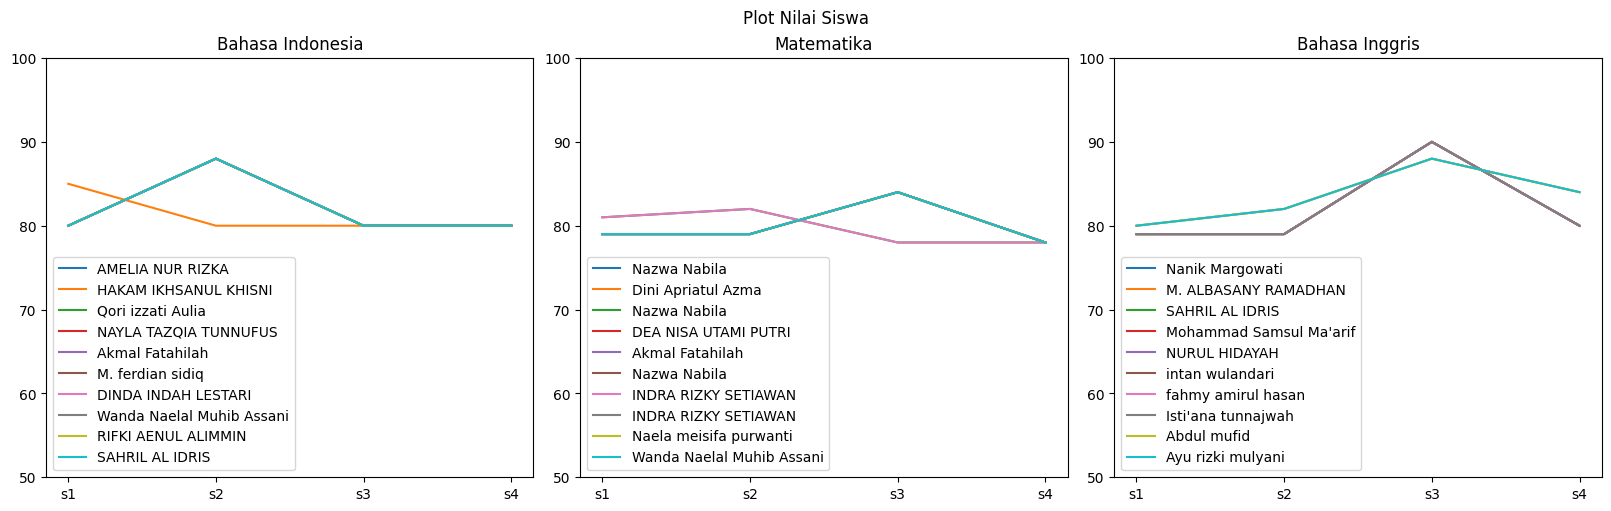

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=(16,5), constrained_layout = True)
fig.suptitle('Plot Nilai Siswa')

label = ["Bahasa Indonesia", "Matematika", "Bahasa Inggris"]

mapel = ["indo", "mtk", "inggris"]
for m in mapel:
    ax = fig.add_subplot(1, 3, mapel.index(m) + 1)
    ax.set_title(label[mapel.index(m)])
    ax.set_ylim(50, 100)
    dtampil = 10
    for j in range(dtampil):
        ax.plot(['s1', 's2', 's3', 's4'], df.sample(dtampil)[[f'{m}1', f'{m}2', f'{m}3', f'{m}4']].values[j], label=df.sample(dtampil)['nama'].values[j])
    ax.legend()

## Split Data

In [4]:
X = {}
y = {}

for m in mapel:
    X[m] = df[[f'{m}1', f'{m}2', f'{m}3', f'{m}4']].values
    y[m] = df[f'{m}'].values

print(X)
print(y)

{'indo': array([[80, 85, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 88, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 

In [5]:
from sklearn.model_selection import train_test_split

X_train = {}
X_test = {}
y_train = {}
y_test = {}

for m in mapel:
    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(X[m], y[m], test_size=0.2, shuffle=False)

print(X_train)
print(X_test)

{'indo': array([[80, 85, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 88, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 80, 80],
       [80, 88, 

## Pelatihan

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
 
best_model = {
    "indo": None,
    "mtk": None,
    "inggris": None
}
best_score = {
    "indo": 0,
    "mtk": 0,
    "inggris": 0
}
y_pred = {}
for m in mapel:
    regr = MLPRegressor(random_state=0, max_iter=1000, hidden_layer_sizes=(32, 64), learning_rate_init=0.02, alpha=0.02).fit(X_train[m], y_train[m])
    y_pred[m] = regr.predict(X_test[m])
    score = mean_squared_error(y_test[m], y_pred[m])
    best_model[m] = regr
    best_score[m] = score
print(best_model)
print(best_score)

{'indo': MLPRegressor(alpha=0.02, hidden_layer_sizes=(32, 64), learning_rate_init=0.02,
             max_iter=1000, random_state=0), 'mtk': MLPRegressor(alpha=0.02, hidden_layer_sizes=(32, 64), learning_rate_init=0.02,
             max_iter=1000, random_state=0), 'inggris': MLPRegressor(alpha=0.02, hidden_layer_sizes=(32, 64), learning_rate_init=0.02,
             max_iter=1000, random_state=0)}
{'indo': 6.828365599675236, 'mtk': 1.9166968026098463, 'inggris': 2.0751675713201485}


# Pengujian

In [7]:
preddf = {}
for m in mapel:
    preddf[m] = pd.DataFrame({'Actual': y_test[m], 'Predicted': y_pred[m]})
    print(preddf[m])

    Actual  Predicted
0       80  79.629748
1       80  79.629748
2       78  79.629748
3       78  79.629748
4       78  79.629748
5       84  79.629748
6       78  79.629748
7       82  79.629748
8       82  79.629748
9       78  79.629748
10      84  79.629748
11      86  79.629748
12      78  79.629748
13      82  79.629748
14      78  79.629748
15      82  79.629748
16      80  79.629748
17      78  79.629748
    Actual  Predicted
0       82  80.161177
1       79  80.161177
2       78  80.161177
3       82  80.161177
4       79  80.161177
5       78  80.161177
6       80  80.161177
7       79  80.161177
8       81  80.161177
9       79  80.161177
10      82  80.161177
11      82  80.161177
12      79  80.161177
13      82  80.161177
14      80  80.161177
15      80  80.161177
16      80  80.161177
17      81  80.161177
    Actual  Predicted
0       83  82.669114
1       84  82.669114
2       83  82.669114
3       83  82.669114
4       81  82.669114
5       82  82.669114
6       83

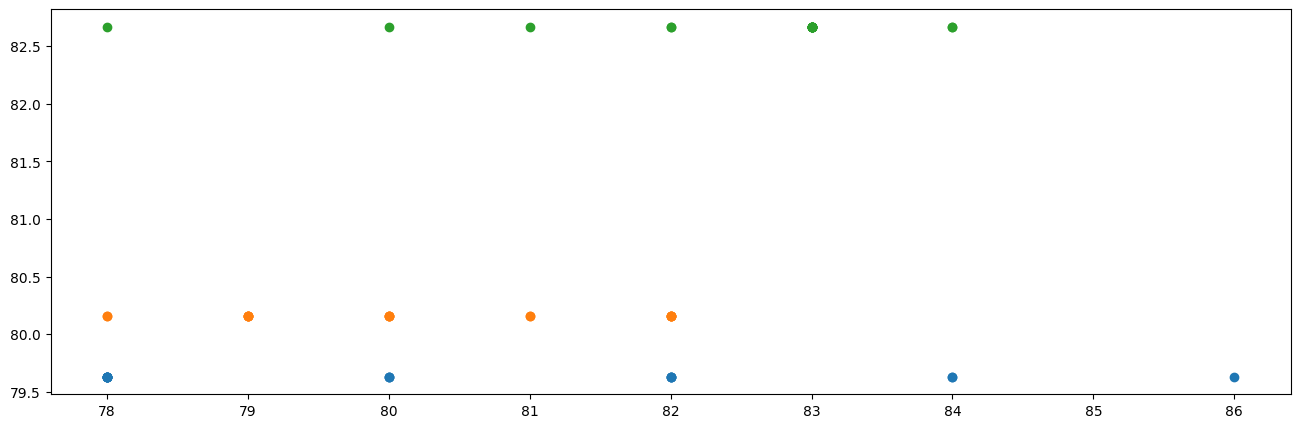

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 5))

for m in mapel:
    plt.plot(y_test[m], y_pred[m], 'o')
    
plt.show()


In [9]:

for m in mapel:
    print(m, root_mean_squared_error(y_test[m], y_pred[m]))

indo 2.613114157413571
mtk 1.3844481942672489
inggris 1.4405441927688816


# Prediksi

In [10]:
best_model["mtk"].predict([[75, 80, 90, 78]])

array([79.26222247])